<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Kwasniewska/PUM_Czyszczenie_danych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [437]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [438]:
df = pd.read_csv('train.csv')
df.head()

<ipython-input-438-04d00b4537ee>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [439]:
df.shape

(100000, 28)

In [440]:
df.drop_duplicates(inplace = True)

In [441]:
df = df.drop(["ID", "Customer_ID", "Name", "SSN"], axis=1)

In [442]:
df.dtypes

Month                        object
Age                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

In [443]:
lista = ["Age","Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Outstanding_Debt", "Amount_invested_monthly", "Monthly_Balance"]
for i in lista:
  df[i] = df[i].astype(str)
  df[i] = df[i].str.replace("_", "")

In [444]:
df[["Age","Annual_Income","Num_of_Loan", "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Outstanding_Debt", "Amount_invested_monthly", "Monthly_Balance"]] = df[["Age","Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Outstanding_Debt", "Amount_invested_monthly", "Monthly_Balance"]].apply(pd.to_numeric, errors='coerce')

In [445]:
df.dtypes

Month                        object
Age                           int64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

In [446]:
df["Month"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

In [447]:
df["Age"].mean()
df["Age"].max()
mean_Age = df.loc[(df['Age'] > 0) & (df['Age'] < 105), "Age"].mean()
df.loc[(df["Age"] < 0) | (df["Age"] >100), "Age"] = mean_Age
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.00000,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23.00000,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,33.32398,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23.00000,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23.00000,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [448]:
df["Occupation"].unique()
mode_Occupation = df.loc[df["Occupation"] != "_______", "Occupation"].mode().values[0]
df.loc[df["Occupation"] == "_______", "Occupation"] = mode_Occupation
df.head(10)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.00000,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23.00000,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,33.32398,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23.00000,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23.00000,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,June,23.00000,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,!@9#%8,340.479212,Good
6,July,23.00000,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,August,23.00000,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
8,January,28.00000,Lawyer,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,February,28.00000,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good


In [449]:
#Drop outlier by IQR calculation
def outliers(data, nameOfColumn):
  Q1 = data[nameOfColumn].quantile(0.25)
  Q3 = data[nameOfColumn].quantile(0.75)
  IQR = Q3 - Q1
  data.drop(data.loc[data[nameOfColumn] > (Q3 + 1.5 * IQR)].index, inplace= True)
  data.drop(data.loc[data[nameOfColumn] < (Q1- 1.5 * IQR)].index, inplace = True)

In [450]:
outliers(df, "Annual_Income")

In [451]:
df["Monthly_Inhand_Salary"].min()
df["Monthly_Inhand_Salary"].max()
outliers(df, "Monthly_Inhand_Salary")
df["Monthly_Inhand_Salary"].isna().sum()
df.loc[df["Monthly_Inhand_Salary"].isna(), "Monthly_Inhand_Salary"] = df["Monthly_Inhand_Salary"].mean()
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.00000,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23.00000,Scientist,19114.12,3956.551162,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,33.32398,Scientist,19114.12,3956.551162,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23.00000,Scientist,19114.12,3956.551162,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23.00000,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [452]:
outliers(df, "Num_Bank_Accounts")
df["Num_Bank_Accounts"].isna().sum()
df.loc[df["Num_Bank_Accounts"] < 0, "Num_Bank_Accounts"].count()
df.drop(df[df["Num_Bank_Accounts"] < 0].index, inplace = True)

In [453]:
outliers(df, "Num_Credit_Card")
df.loc[df["Num_Credit_Card"] < 0, "Num_Credit_Card"].count()
df["Num_Credit_Card"].isna().sum()

0

In [454]:
outliers(df, "Interest_Rate")
df["Interest_Rate"].isna().sum()
df.loc[df["Interest_Rate"] <0, "Interest_Rate"].count()

0

In [455]:
outliers(df, "Num_of_Loan")
df["Num_of_Loan"].describe()
df["Num_of_Loan"].isna().sum()

0

In [456]:
df["Type_of_Loan"].isna().sum()
df.groupby(df["Type_of_Loan"])["Type_of_Loan"].count().sort_values(ascending = False)
mode_Type_of_Loan = df["Type_of_Loan"].mode().values[0]
df.loc[df["Type_of_Loan"].isna(), "Type_of_Loan"] = mode_Type_of_Loan

In [457]:
outliers(df, "Delay_from_due_date")
df.loc[df["Delay_from_due_date"] < 0, "Delay_from_due_date"].count()
df.drop(df[df["Delay_from_due_date"] <0].index, inplace = True)
df["Delay_from_due_date"].isna().sum()

0

In [458]:
outliers(df, "Num_of_Delayed_Payment")
df["Num_of_Delayed_Payment"].isna().sum()
df.loc[df["Num_of_Delayed_Payment"].isna(), "Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].median()
df.loc[df["Num_of_Delayed_Payment"] <0, "Num_of_Delayed_Payment"].count()
df.drop(df[df["Num_of_Delayed_Payment"] <0].index, inplace = True)

In [459]:
outliers(df, "Changed_Credit_Limit")
df.loc[df["Changed_Credit_Limit"]<0, "Changed_Credit_Limit"].count()
df.drop(df[df["Changed_Credit_Limit"] <0].index, inplace = True)
df["Changed_Credit_Limit"].isna().sum()
df.loc[df["Changed_Credit_Limit"].isna(), "Changed_Credit_Limit"] = df["Changed_Credit_Limit"].median()

In [460]:
outliers(df, "Num_Credit_Inquiries")
df.loc[df["Num_Credit_Inquiries"]<0, "Num_Credit_Inquiries"].count()
df.loc[df["Num_Credit_Inquiries"].isna(), "Num_Credit_Inquiries"] = df["Num_Credit_Inquiries"].median()

In [461]:
df["Credit_Mix"].unique()
df.groupby(df["Credit_Mix"])["Credit_Mix"].count()
mode_Credit_Mix = df["Credit_Mix"].mode().values[0]
df.loc[df["Credit_Mix"] == "_", "Credit_Mix"] = mode_Credit_Mix
df.groupby(df["Credit_Mix"])["Credit_Mix"].count()

Credit_Mix
Bad         13225
Good        18314
Standard    46826
Name: Credit_Mix, dtype: int64

In [462]:
df["Outstanding_Debt"].describe()
df["Outstanding_Debt"].isna().sum()
outliers(df, "Outstanding_Debt")

In [463]:
df["Credit_Utilization_Ratio"].describe()
outliers(df, "Credit_Utilization_Ratio")
df["Credit_Utilization_Ratio"].isna().sum()

0

In [464]:
df["Credit_History_Age"].unique()
df["Credit_History_Age"].isna().sum()
df.groupby(df["Credit_History_Age"])["Credit_History_Age"].count().sort_values(ascending = False)
mode_Credit_History_Age = df["Credit_History_Age"].mode().values[0]
df.loc[df["Credit_History_Age"].isna(), "Credit_History_Age"] = mode_Credit_History_Age

In [465]:
df["Payment_of_Min_Amount"].unique()
df.groupby(df["Payment_of_Min_Amount"])["Payment_of_Min_Amount"].count().sort_values(ascending = False)

Payment_of_Min_Amount
Yes    37117
No     27655
NM      8815
Name: Payment_of_Min_Amount, dtype: int64

In [466]:
df["Total_EMI_per_month"].describe()
outliers(df, "Total_EMI_per_month")
df["Total_EMI_per_month"].isna().sum()

0

In [467]:
df["Amount_invested_monthly"].describe()
outliers(df, "Amount_invested_monthly")
df["Amount_invested_monthly"].isna().sum()
df.loc[df["Amount_invested_monthly"].isna(), "Amount_invested_monthly"] = df["Amount_invested_monthly"].median()
df.loc[df["Amount_invested_monthly"] <0, "Amount_invested_monthly"].count()

0

In [468]:
df["Payment_Behaviour"].unique()
df["Payment_Behaviour"].isna().sum()
df.groupby(df["Payment_Behaviour"])["Payment_Behaviour"].count().sort_values(ascending = False)
mode_Payment_Behaviour = df["Payment_Behaviour"].mode().values[0]
df.loc[df["Payment_Behaviour"] == "!@9#%8", "Payment_Behaviour"] = mode_Payment_Behaviour
df.groupby(df["Payment_Behaviour"])["Payment_Behaviour"].count().sort_values(ascending = False)

Payment_Behaviour
Low_spent_Small_value_payments      20138
High_spent_Medium_value_payments    11644
High_spent_Large_value_payments      8725
Low_spent_Medium_value_payments      7484
High_spent_Small_value_payments      7265
Low_spent_Large_value_payments       6354
Name: Payment_Behaviour, dtype: int64

In [469]:
df["Monthly_Balance"].describe()
outliers(df,"Monthly_Balance")
df["Monthly_Balance"].describe()
df["Monthly_Balance"].isna().sum()
df.loc[df["Monthly_Balance"].isna(), "Monthly_Balance"] = df["Monthly_Balance"].median()

In [470]:
df["Credit_Score"].unique()
df["Credit_Score"].isna().sum()

0

In [471]:
le = LabelEncoder()
cols = ["Month", "Occupation", "Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour", "Credit_Score"]
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3,23.00000,12,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,2,809.98,26.822620,22 Years and 1 Months,1,49.574949,80.415295,2,312.494089,0
2,6,33.32398,12,19114.12,3956.551162,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,1,809.98,28.609352,22 Years and 3 Months,1,49.574949,81.699521,4,331.209863,0
3,0,23.00000,12,19114.12,3956.551162,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,1,809.98,31.377862,22 Years and 4 Months,1,49.574949,199.458074,5,223.451310,0
4,7,23.00000,12,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,1,809.98,24.797347,22 Years and 5 Months,1,49.574949,41.420153,1,341.489231,0
5,5,23.00000,12,19114.12,3956.551162,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,1,809.98,27.262259,22 Years and 6 Months,1,49.574949,62.430172,5,340.479212,0


In [472]:
df["Credit_History_Age"].head()
df["Credit_History_Age"] = df["Credit_History_Age"].str.split()

In [473]:
df["Credit_History_Age"] = (df["Credit_History_Age"].str.get(0).apply(pd.to_numeric, errors='coerce'))*12 + df["Credit_History_Age"].str.get(3).apply(pd.to_numeric, errors='coerce')
df["Credit_History_Age"].head()

0    265
2    267
3    268
4    269
5    270
Name: Credit_History_Age, dtype: int64

In [474]:
df["Type_of_Loan"] = df["Type_of_Loan"].str.replace("and ", "").str.split(", ")

In [475]:
columns_for_type_of_loan = set()
for i in df["Type_of_Loan"]:
  for j in i:
    columns_for_type_of_loan.add(j)
for i in columns_for_type_of_loan:
  lista = list()
  for j in df["Type_of_Loan"]:
    if(i in j):
      lista.append(1)
    else:
      lista.append(0)
  df[i] = lista
df = df.drop(["Type_of_Loan"], axis=1)
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Score,Student Loan,Not Specified,Payday Loan,Home Equity Loan,Credit-Builder Loan,Debt Consolidation Loan,Personal Loan,Mortgage Loan,Auto Loan
0,3,23.00000,12,19114.12,1824.843333,3,4,3,4,3,...,0,0,0,0,1,1,0,1,0,1
2,6,33.32398,12,19114.12,3956.551162,3,4,3,4,3,...,0,0,0,0,1,1,0,1,0,1
3,0,23.00000,12,19114.12,3956.551162,3,4,3,4,5,...,0,0,0,0,1,1,0,1,0,1
4,7,23.00000,12,19114.12,1824.843333,3,4,3,4,6,...,0,0,0,0,1,1,0,1,0,1
5,5,23.00000,12,19114.12,3956.551162,3,4,3,4,8,...,0,0,0,0,1,1,0,1,0,1


In [476]:
scaler = MinMaxScaler()
col_float = ["Age", "Annual_Income" , "Monthly_Inhand_Salary","Delay_from_due_date", "Num_of_Delayed_Payment","Outstanding_Debt", "Credit_History_Age", "Total_EMI_per_month", "Amount_invested_monthly", "Monthly_Balance"]
for i in df[col_float]:
  df[i] = scaler.fit_transform(df[[i]])
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Score,Student Loan,Not Specified,Payday Loan,Home Equity Loan,Credit-Builder Loan,Debt Consolidation Loan,Personal Loan,Mortgage Loan,Auto Loan
0,3,0.105882,12,0.083592,0.127216,3,4,3,4,0.054545,...,0,0,0,0,1,1,0,1,0,1
2,6,0.227341,12,0.083592,0.308890,3,4,3,4,0.054545,...,0,0,0,0,1,1,0,1,0,1
3,0,0.105882,12,0.083592,0.308890,3,4,3,4,0.090909,...,0,0,0,0,1,1,0,1,0,1
4,7,0.105882,12,0.083592,0.127216,3,4,3,4,0.109091,...,0,0,0,0,1,1,0,1,0,1
5,5,0.105882,12,0.083592,0.308890,3,4,3,4,0.145455,...,0,0,0,0,1,1,0,1,0,1


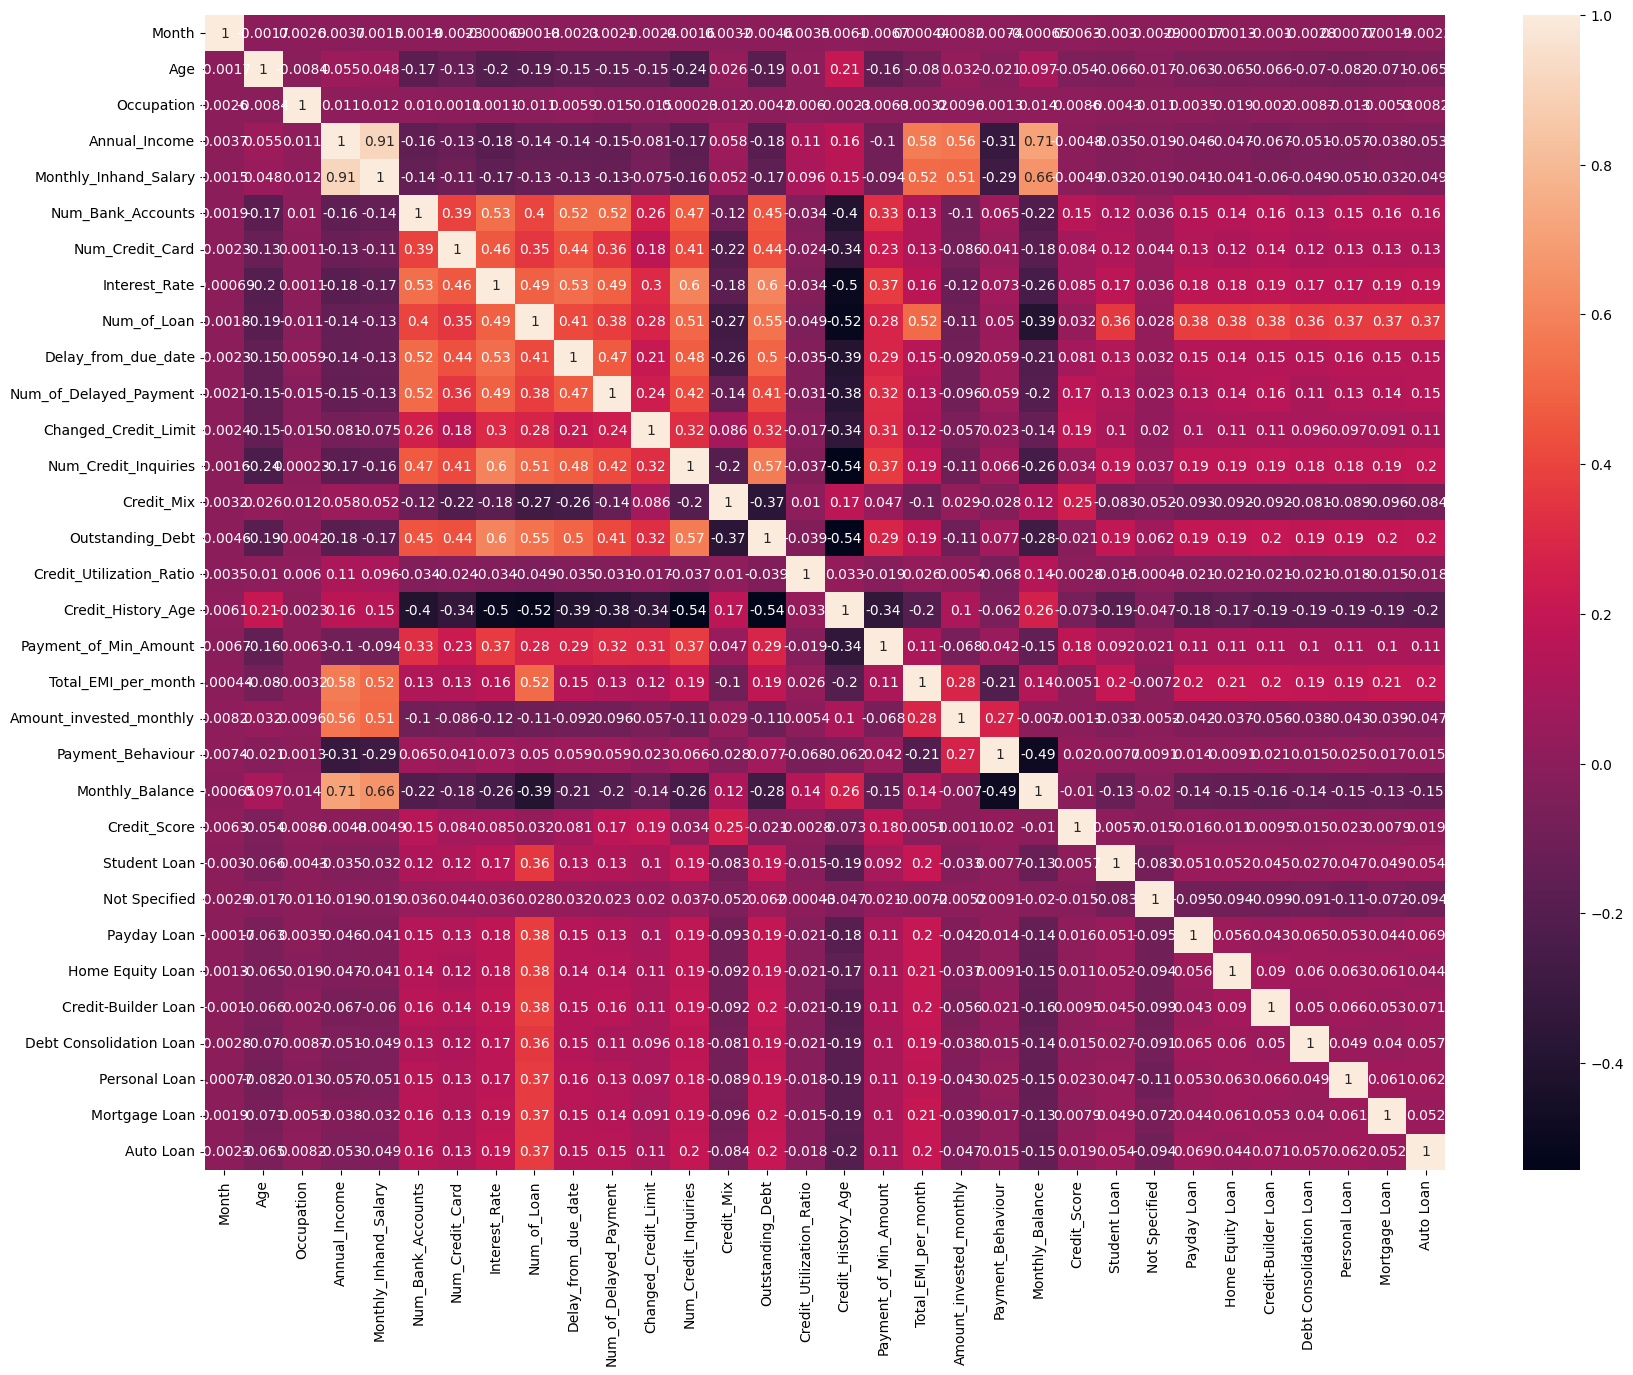

In [481]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [483]:
df = df.drop(["Monthly_Inhand_Salary"], axis=1)

In [492]:
cor_target = abs(corr_matrix["Credit_Score"])
relevant_features = cor_target[cor_target< 0.002]
relevant_features

Amount_invested_monthly    0.001122
Name: Credit_Score, dtype: float64

In [499]:
import numpy as np
from sklearn.decomposition import PCA
x = df.drop(["Credit_Score"], axis=1)
pca = PCA()
df2 = pca.fit(x)
#print(pca.explained_variance_ratio_)
pca.fit_transform(x)

array([[-1.01483661e+01,  4.76943551e+00, -5.47547847e+00, ...,
        -1.37886608e-01, -3.35679275e-02, -1.23010344e-02],
       [-1.06982280e+01,  3.12887870e+00, -3.75746962e+00, ...,
        -2.70232612e-02, -1.51510623e-02, -1.96687836e-02],
       [-1.18015629e+01,  4.85670335e-02, -1.06665084e+00, ...,
        -1.48713397e-01, -3.19244661e-02, -1.68544359e-02],
       ...,
       [-7.18297308e+00,  3.64017532e+00,  8.40644368e+00, ...,
        -1.43140298e-01, -6.01736989e-02, -4.87628301e-03],
       [-6.93013817e+00,  3.59092883e+00,  1.42586968e+00, ...,
        -1.40216959e-01, -7.87971444e-02, -1.49789365e-03],
       [-6.91781204e+00,  3.58459280e+00,  1.91991760e+00, ...,
        -1.52542700e-01, -5.09509221e-02,  6.12762349e-03]])